In [157]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [158]:
data_path = './data/smartwatches.csv'
df = pd.read_csv(data_path)
df.drop_duplicates(inplace=True)
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)
train_df = train_df.reset_index()
test_df = test_df.reset_index()

In [159]:
df.shape, train_df.shape, test_df.shape

((450, 16), (360, 17), (90, 17))

In [160]:
train_df.head()

,index,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,407,407,zebronics,2949.0,4199.0,29.768993,3.1,10.0,LEATHER fit-650,Oval,Black,Leather,Yes,NaN,Yes,2.7 inches,NaN
1,444,444,fire-boltt,6999.0,15999.0,56.253516,2.6,NaN,bsw020,Circle,Brown,Silicon,Yes,8.0,Yes,1.4 inches,NaN
2,117,117,fire-boltt,2499.0,11999.0,79.173264,4.1,1990.0,BSW070,NaN,NaN,NaN,Yes,8.0,Yes,1.9 inches,75g +
3,30,30,boat,1999.0,7990.0,74.981227,3.6,827.0,NaN,NaN,NaN,NaN,NaN,8.0,Yes,NaN,75g +
4,415,415,fire-boltt,2299.0,5999.0,61.676946,2.5,24.0,NINJA PRO MAX,Square,Blue,Silicon,Yes,22.0,Yes,1.6 inches,NaN


In [161]:
train_df.drop(['index', 'Unnamed: 0'], axis=1, inplace=True)

In [162]:
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,zebronics,2949.0,4199.0,29.768993,3.1,10.0,LEATHER fit-650,Oval,Black,Leather,Yes,NaN,Yes,2.7 inches,NaN
1,fire-boltt,6999.0,15999.0,56.253516,2.6,NaN,bsw020,Circle,Brown,Silicon,Yes,8.0,Yes,1.4 inches,NaN
2,fire-boltt,2499.0,11999.0,79.173264,4.1,1990.0,BSW070,NaN,NaN,NaN,Yes,8.0,Yes,1.9 inches,75g +
3,boat,1999.0,7990.0,74.981227,3.6,827.0,NaN,NaN,NaN,NaN,NaN,8.0,Yes,NaN,75g +
4,fire-boltt,2299.0,5999.0,61.676946,2.5,24.0,NINJA PRO MAX,Square,Blue,Silicon,Yes,22.0,Yes,1.6 inches,NaN


In [163]:
train_df['Display Size'].isna().sum()

27

In [164]:
train_df['Display Size'].value_counts().count()

34

In [165]:
train_df['Display Size'].fillna('0.0 inches', inplace=True)

In [166]:
train_df['Display Size'].isna().sum()

0

In [167]:
train_df['Display Size'] = train_df['Display Size'].apply(lambda x: float(x.split()[0]))

In [168]:
train_df['Display Size'].head()

0    2.7
1    1.4
2    1.9
3    0.0
4    1.6
Name: Display Size, dtype: float64

In [169]:
train_df['Display Size'].replace(0.0, np.nan, inplace=True)

In [170]:
train_df['Display Size'].isna().sum()

28

In [171]:
train_df['Weight'].value_counts()

20 - 35 g    63
75g +        58
35 - 50 g    45
<= 20 g      30
50 - 75 g    15
Name: Weight, dtype: int64

In [172]:
re.findall('\d+', '20 - 35 g ')

['20', '35']

In [173]:
cal = sum([int(x) for x in re.findall('\d+', '20 - 35 g ')]) / 2
train_df['Weight'].replace('20 - 35 g', cal, inplace=True)

In [174]:
cal = sum([int(x) for x in re.findall('\d+', '35 - 50 g')]) / 2
train_df['Weight'].replace('35 - 50 g', cal, inplace=True)

In [175]:
cal = sum([int(x) for x in re.findall('\d+', '50 - 75 g')]) / 2
train_df['Weight'].replace('50 - 75 g', cal, inplace=True)

In [176]:
train_df['Weight'].replace('75g +', float(re.findall('\d+', '75g +')[0]), inplace=True)

In [177]:
train_df['Weight'].replace('<= 20 g', float(re.findall('\d+', '<= 20 g')[0]), inplace=True)

In [178]:
train_df['Weight'].value_counts()

27.5    63
75.0    58
42.5    45
20.0    30
62.5    15
Name: Weight, dtype: int64

In [179]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                360 non-null    object 
 1   Current Price        354 non-null    float64
 2   Original Price       304 non-null    float64
 3   Discount Percentage  304 non-null    float64
 4   Rating               356 non-null    float64
 5   Number OF Ratings    315 non-null    float64
 6   Model Name           330 non-null    object 
 7   Dial Shape           260 non-null    object 
 8   Strap Color          260 non-null    object 
 9   Strap Material       304 non-null    object 
 10  Touchscreen          329 non-null    object 
 11  Battery Life (Days)  330 non-null    float64
 12  Bluetooth            355 non-null    object 
 13  Display Size         332 non-null    float64
 14  Weight               211 non-null    float64
dtypes: float64(8), object(7)
memory usage: 4

In [180]:
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,zebronics,2949.0,4199.0,29.768993,3.1,10.0,LEATHER fit-650,Oval,Black,Leather,Yes,NaN,Yes,2.7,NaN
1,fire-boltt,6999.0,15999.0,56.253516,2.6,NaN,bsw020,Circle,Brown,Silicon,Yes,8.0,Yes,1.4,NaN
2,fire-boltt,2499.0,11999.0,79.173264,4.1,1990.0,BSW070,NaN,NaN,NaN,Yes,8.0,Yes,1.9,75.0
3,boat,1999.0,7990.0,74.981227,3.6,827.0,NaN,NaN,NaN,NaN,NaN,8.0,Yes,NaN,75.0
4,fire-boltt,2299.0,5999.0,61.676946,2.5,24.0,NINJA PRO MAX,Square,Blue,Silicon,Yes,22.0,Yes,1.6,NaN


In [181]:
train_df['Discount Price'] = (train_df['Original Price'] * (-train_df['Discount Percentage'])) / 100

In [182]:
train_df.drop(['Discount Percentage'], axis=1, inplace=True)

#### Numerical Data

In [183]:
numerical_col = [feature for feature in train_df.columns if train_df[feature].dtype == 'float64']

In [184]:
numerical_col

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight',
 'Discount Price']

In [185]:
train_df[numerical_col].head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
0,2949.0,4199.0,3.1,10.0,NaN,2.7,NaN,-1250.000000
1,6999.0,15999.0,2.6,NaN,8.0,1.4,NaN,-8999.999999
2,2499.0,11999.0,4.1,1990.0,8.0,1.9,75.0,-9500.000000
3,1999.0,7990.0,3.6,827.0,8.0,NaN,75.0,-5991.000000
4,2299.0,5999.0,2.5,24.0,22.0,1.6,NaN,-3700.000000


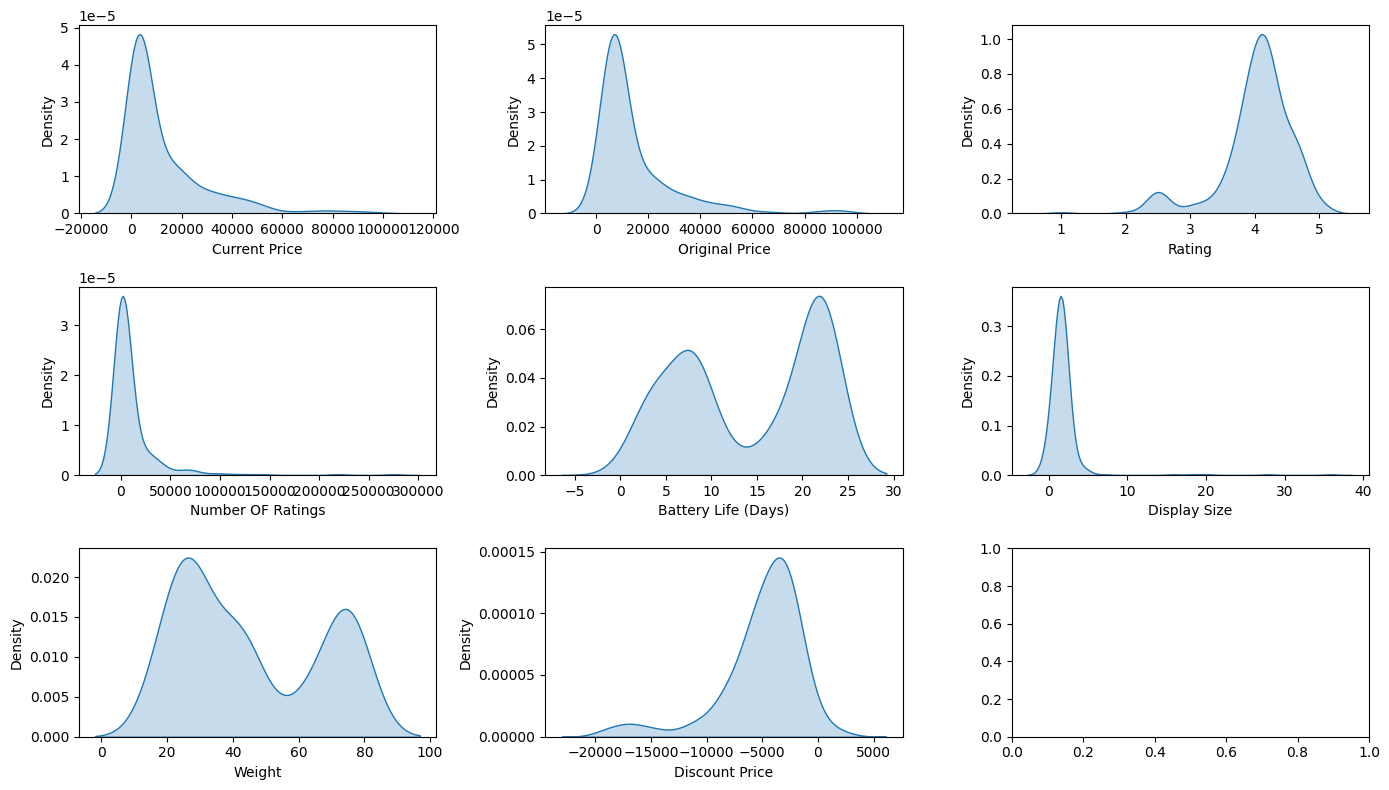

In [186]:
fig , axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 8))

for i , colum in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.kdeplot(data=train_df[colum], ax=ax, fill=True)

fig.tight_layout()
plt.show()

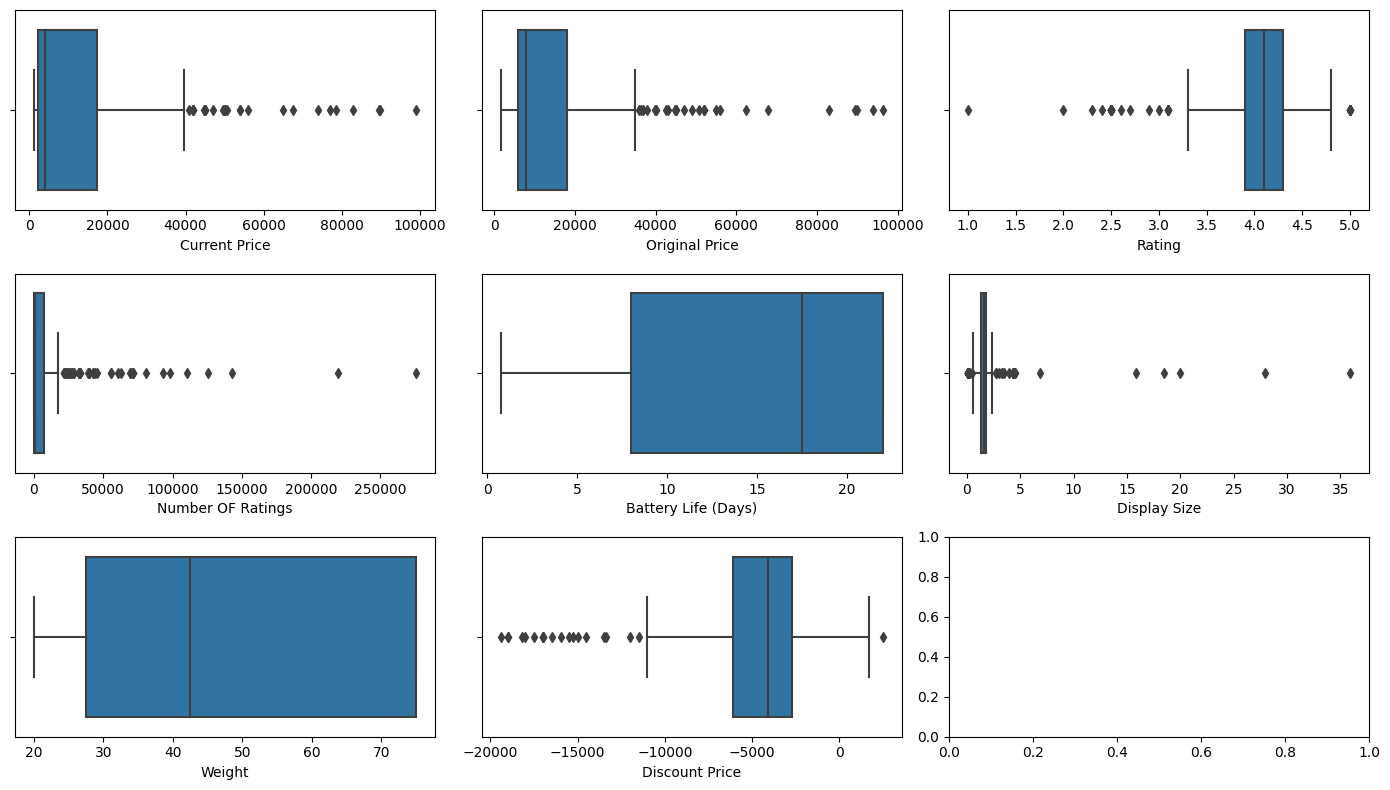

In [187]:
fig , axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 8))

for i , colum in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x=train_df[colum], ax=ax)

fig.tight_layout()
plt.show()

In [188]:
def remove_outliers_IQR(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] > lower_bound) & (data[col] < upper_bound)]

In [189]:
train_df.columns

Index(['Brand', 'Current Price', 'Original Price', 'Rating',
       'Number OF Ratings', 'Model Name', 'Dial Shape', 'Strap Color',
       'Strap Material', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'Weight', 'Discount Price'],
      dtype='object')

In [195]:
train_df.shape

(143, 15)

In [191]:
import_col = ['Current Price', 'Original Price', 'Rating', 'Number OF Ratings', 'Display Size']

In [192]:
for col in import_col:
    train_df = remove_outliers_IQR(train_df, col)

In [193]:
for col in numerical_col:
    print(col)
    train_df[col].fillna(train_df[col].median(), inplace=True)

Current Price
Original Price
Rating
Number OF Ratings
Battery Life (Days)
Display Size
Weight
Discount Price


In [194]:
train_df.shape

(143, 15)

In [196]:
train_df.isna().sum()

Brand                   0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Model Name              9
Dial Shape             56
Strap Color            56
Strap Material         23
Touchscreen             6
Battery Life (Days)     0
Bluetooth               0
Display Size            0
Weight                  0
Discount Price          0
dtype: int64

In [198]:
train_df[numerical_col].head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
2,2499.0,11999.0,4.1,1990.0,8.0,1.9,75.0,-9500.0
5,2499.0,6999.0,4.3,3944.0,22.0,1.9,42.5,-4500.0
6,3499.0,5999.0,4.2,1785.0,22.0,1.8,75.0,-2500.0
12,2126.0,5999.0,3.7,18.0,8.0,1.9,27.5,-3873.0
19,11499.0,18999.0,3.9,406.0,12.5,1.4,42.5,-7500.0


In [201]:
from sklearn.preprocessing import MinMaxScaler

In [202]:
scaler = MinMaxScaler()

In [203]:
data = scaler.fit_transform(train_df[numerical_col[:-1]])

In [204]:
data

array([[0.06565657, 0.4683556 , 0.66666667, ..., 0.34117647, 0.66666667,
        1.        ],
       [0.06565657, 0.23720586, 0.83333333, ..., 1.        , 0.66666667,
        0.40909091],
       [0.11616162, 0.19097591, 0.75      , ..., 1.        , 0.58333333,
        1.        ],
       ...,
       [0.09090909, 0.19097591, 0.83333333, ..., 1.        , 0.5       ,
        0.40909091],
       [0.05050505, 0.        , 0.66666667, ..., 0.12941176, 0.33333333,
        0.        ],
       [0.53030303, 0.60704544, 0.83333333, ..., 0.12941176, 0.16666667,
        0.13636364]])

In [205]:
data = pd.DataFrame(data, columns=numerical_col[:-1])

In [206]:
data.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,0.065657,0.468356,0.666667,0.059470,0.341176,0.666667,1.000000
1,0.065657,0.237206,0.833333,0.117952,1.000000,0.666667,0.409091
2,0.116162,0.190976,0.750000,0.053334,1.000000,0.583333,1.000000
3,0.046818,0.190976,0.333333,0.000449,0.341176,0.666667,0.136364
4,0.520202,0.791965,0.500000,0.012062,0.552941,0.250000,0.409091


In [207]:
data.shape, train_df.shape

((143, 7), (143, 15))

In [208]:
data.isna().sum()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
dtype: int64

In [209]:
train_df.drop(numerical_col[:-1], axis=1, inplace=True)

In [210]:
train_df.head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Discount Price
2,fire-boltt,BSW070,NaN,NaN,NaN,Yes,Yes,-9500.0
5,noise,"ColorFit Loop Advanced BT Calling with 1.85"" d...",Square,Grey,Silicon,Yes,Yes,-4500.0
6,dizo,Watch D Talk 1.8 display with calling&7 day ba...,Rectangle,Grey,Silicon,Yes,Yes,-2500.0
12,dizo,NaN,NaN,NaN,NaN,Yes,Yes,-3873.0
19,honor,MUS-B19,NaN,NaN,NaN,Yes,Yes,-7500.0


In [211]:
train_df = pd.concat([train_df, data], axis=1)

In [212]:
train_df.head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Discount Price,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
2,fire-boltt,BSW070,NaN,NaN,NaN,Yes,Yes,-9500.0,0.116162,0.190976,0.750000,0.053334,1.000000,0.583333,1.000000
5,noise,"ColorFit Loop Advanced BT Calling with 1.85"" d...",Square,Grey,Silicon,Yes,Yes,-4500.0,0.005051,0.375896,0.750000,0.771609,0.341176,0.500000,0.409091
6,dizo,Watch D Talk 1.8 display with calling&7 day ba...,Rectangle,Grey,Silicon,Yes,Yes,-2500.0,0.065657,0.375896,0.750000,0.697324,0.129412,0.583333,0.772727
12,dizo,NaN,NaN,NaN,NaN,Yes,Yes,-3873.0,0.166667,0.260321,0.333333,0.000000,1.000000,0.500000,0.409091
19,honor,MUS-B19,NaN,NaN,NaN,Yes,Yes,-7500.0,0.106061,0.190976,0.583333,0.002963,0.552941,0.166667,1.000000


In [213]:
train_df[numerical_col]

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
2,0.116162,0.190976,0.750000,0.053334,1.000000,0.583333,1.000000,-9500.0
5,0.005051,0.375896,0.750000,0.771609,0.341176,0.500000,0.409091,-4500.0
6,0.065657,0.375896,0.750000,0.697324,0.129412,0.583333,0.772727,-2500.0
12,0.166667,0.260321,0.333333,0.000000,1.000000,0.500000,0.409091,-3873.0
19,0.106061,0.190976,0.583333,0.002963,0.552941,0.166667,1.000000,-7500.0
...,...,...,...,...,...,...,...,...
132,0.545000,0.837779,0.833333,0.037891,0.341176,0.250000,0.409091,NaN
135,0.292929,0.375896,0.000000,0.000509,0.788235,0.083333,0.409091,NaN
136,0.030303,0.190976,0.750000,0.972764,1.000000,0.333333,0.409091,NaN
137,0.040404,0.098516,0.500000,0.104424,1.000000,0.416667,0.136364,NaN
